## News Category

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
import string

In [2]:
data_path = 'C:/Users/ND/Desktop/nlp_proje/archive/News_Category_Dataset_v3.json'

In [3]:
dlist = []
with open(data_path) as files:
    for file in files:
        dlist.append(json.loads(file))

In [4]:
data = pd.DataFrame(dlist)
data.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [6]:
data.isna().sum()
#df. isna(). sum() returns the number of missing values in each column.

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [7]:
# unique labels
np.unique(data.category)

array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
       'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
       'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
       'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
       'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
       'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
       'TRAVEL', 'U.S. NEWS', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS',
       'WOMEN', 'WORLD NEWS', 'WORLDPOST'], dtype=object)

In [8]:
len(np.unique(data.category))

42

In [9]:
new_data = pd.DataFrame(dlist)

In [10]:
new_data['text'] = new_data['headline'] + new_data['short_description'] + new_data['authors']
new_data['label'] = new_data['category']
del new_data['headline']
del new_data['short_description']
del new_data['date']
del new_data['authors']
del new_data['link']
del new_data['category']

In [11]:
new_data.head(10)

,text,label
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS
6,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS
7,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS
8,How A New Documentary Captures The Complexity ...,CULTURE & ARTS
9,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS


In [12]:
new_data['text'].apply(lambda x: len(x.split(' '))).sum()

6598878

In [13]:
data.category.value_counts()[:5]

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
Name: category, dtype: int64

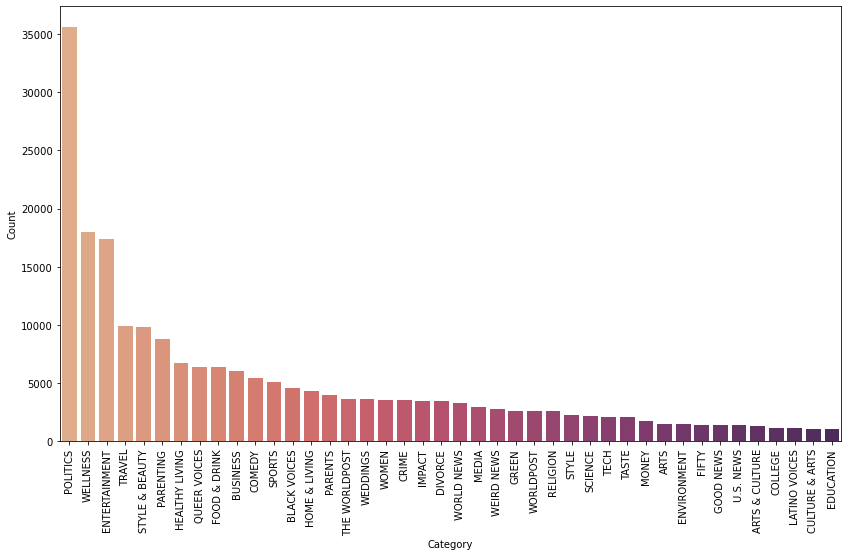

In [14]:
plt.figure(figsize=(14,8))
count = new_data.label.value_counts()
sns.barplot(x=count.index, y=count,palette='flare')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);

### Cleaning Data

In [15]:
import re
from string import punctuation
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [16]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [17]:
lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))

In [18]:
def clean_text(txt):
    #lower case
    txt = txt.lower()
    # sub - eşleşmeleri verilen ifade ile değiştirir
    txt =  re.sub(r'@\S+', '',txt)                    
    # remove twitter handles / @
    txt =  re.sub(r'http\S+', '',txt)                  
    # remove urls
    txt =  re.sub(r'pic.\S+', '',txt)
    # only keeps characters
    txt =  re.sub(r"[^a-zA-Z+']", ' ',txt)             
    # only keeps characters
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt+' ')      
    # keep words with length>1 only
    txt = "".join([i for i in txt if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(txt)   
    # remove stopwords
    txt = " ".join([i for i in words if i not in stopwords and len(i)>2])
    #Python'daki Strip() yöntemi, verilen karakterleri orijinal dizenin başından ve sonundan kaldırır veya keser. 
    #Strip() yönteminin varsayılan davranışı,dizenin başından ve sonundaki boşluğu kaldırmaktır
    txt= re.sub("\s[\s]+", " ",txt).strip()           
    # remove repeated/leading/trailing spaces
    clean_txt = []
    for w in word_tokenize(txt):
        if w.lower() not in stopwords:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_txt.append(new_w)
    txt = " ".join(clean_txt)
    
    return txt

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ND\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
new_data['Text_cleaning'] = new_data['text'].apply(clean_text)


new_data.head()


,text,label,Text_cleaning
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,million american roll sleeve omicron target co...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,american airline flyer charge ban life punch f...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,funniest tweet cat dog week sept dog dont unde...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,funniest tweet parent week sept accidentally p...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,woman call cop black bird watcher loses lawsui...


In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ND\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
new_data.drop('tokenization-lemmatization',axis=1, inplace=True)

KeyError: "['tokenization-lemmatization'] not found in axis"

In [23]:
new_data.head()

,text,label,Text_cleaning
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,million american roll sleeve omicron target co...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,american airline flyer charge ban life punch f...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,funniest tweet cat dog week sept dog dont unde...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,funniest tweet parent week sept accidentally p...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,woman call cop black bird watcher loses lawsui...


In [24]:
new_data.rename(columns ={'Text_cleaning':'clean_text'},inplace=True)

In [25]:
new_data.head()

,text,label,clean_text
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,million american roll sleeve omicron target co...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,american airline flyer charge ban life punch f...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,funniest tweet cat dog week sept dog dont unde...
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,funniest tweet parent week sept accidentally p...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,woman call cop black bird watcher loses lawsui...


In [26]:
df = new_data

In [27]:
df.to_csv('news_cleaned.csv',columns=['text','label','clean_text'])

In [28]:
new_data['clean_text'].apply(lambda x: len(x.split(' '))).sum()
#Verileri temizledikten sonra kaç kelime kaldığını kontrol ettik.

4294953

### Splitting Data

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [30]:
vectorizer = CountVectorizer(max_features=30000, ngram_range=(1, 2))
data_vectorizer = vectorizer.fit_transform(new_data['clean_text']) #X

In [31]:
labels = new_data['label'] #y

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data_vectorizer, labels, test_size=0.2, random_state=42)


### Training Model

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

##### Bayes

In [61]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [57]:
y_pred_nb = nb.predict(X_test)

In [58]:
Acc_train = nb.score(X_train, y_train)
acc_test = nb.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 78.01%
Test Accuracy  : 69.93%


In [59]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

          ARTS       0.67      0.45      0.54       293
ARTS & CULTURE       0.76      0.53      0.62       275
  BLACK VOICES       0.61      0.51      0.56       889
      BUSINESS       0.55      0.62      0.58      1216
       COLLEGE       0.59      0.42      0.49       202
        COMEDY       0.57      0.65      0.61      1022
         CRIME       0.45      0.72      0.56       713
CULTURE & ARTS       0.77      0.40      0.53       202
       DIVORCE       0.74      0.73      0.74       664
     EDUCATION       0.57      0.41      0.48       209
 ENTERTAINMENT       0.74      0.80      0.77      3419
   ENVIRONMENT       0.78      0.29      0.42       313
         FIFTY       0.67      0.35      0.46       263
  FOOD & DRINK       0.75      0.89      0.81      1270
     GOOD NEWS       0.77      0.47      0.59       270
         GREEN       0.44      0.50      0.47       532
HEALTHY LIVING       0.61      0.57      0.59  

##### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
rforest.fit(X_train,y_train)
# Predict - Test 
y_pred_rf = rforest.predict(X_test)

In [67]:
rf_accuary = accuracy_score(y_test, y_pred)
print(rf_accuary)

0.6374027585548608


In [64]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [66]:
cf_report = (classification_report(y_test, y_pred))
print(cf_report)

                precision    recall  f1-score   support

          ARTS       0.49      0.51      0.50       293
ARTS & CULTURE       0.87      0.59      0.71       275
  BLACK VOICES       0.64      0.37      0.47       889
      BUSINESS       0.52      0.40      0.46      1216
       COLLEGE       0.49      0.45      0.47       202
        COMEDY       0.66      0.55      0.60      1022
         CRIME       0.47      0.44      0.45       713
CULTURE & ARTS       0.77      0.40      0.52       202
       DIVORCE       0.88      0.61      0.72       664
     EDUCATION       0.72      0.29      0.41       209
 ENTERTAINMENT       0.62      0.75      0.68      3419
   ENVIRONMENT       0.85      0.19      0.30       313
         FIFTY       0.46      0.24      0.31       263
  FOOD & DRINK       0.73      0.79      0.76      1270
     GOOD NEWS       0.60      0.40      0.48       270
         GREEN       0.38      0.17      0.24       532
HEALTHY LIVING       0.49      0.48      0.49  